## Sobre o Workshop LeanDL-HPC 2025

https://sites.labic.icmc.usp.br/leandl2025/

O LeanDL-HPC 20225 se propõe a explorar e difundir técnicas que permitam **tornar o Deep Learning mais eficiente e escalável no contexto de HPC**, especialmente quando os modelos ultrapassam os recursos típicos dessas infraestruturas. Entre os tópicos em foco estão:

* **Distilação e compressão de modelos**.
* **Quantização**, **pruning**, **cálculos esparços** e **afinamento eficiente de parâmetros**.
* **Otimização de pipelines de inferência** e **deploy consciente de memória/computação**.
* Treinamento e ajuste de LLMs (Modelos de Linguagem de Grande Porte) em sistemas HPC.
* Uso de **arquiteturas leves** como GNNs e CNNs para aplicações científicas.
* Estratégias de **Green AI** e eficiência energética em DL para HPC.



## Este Notebook e o Desafio

Este notebook apresenta **detalhes sobre um dataset** preparado especialmente para um **challenge do workshop LeanDL-HPC 2025**.

O uso deste conjunto de dados é **opcional** e voltado a participantes que desejam trabalhar em uma **tarefa específica** proposta pelo evento.

O desafio envolve **mapear uma amostra teses e dissertações de 2023 para temas estratégicos predefinidos de cada UF**, explorando diferentes níveis de aderência (**BAIXA**, **MÉDIA**, **ALTA**) e, quando possível, apresentando justificativas.

Além de servir como recurso de exploração inicial, o notebook pode apoiar na preparação de soluções para submissão no workshop, alinhadas aos objetivos do LeanDL-HPC 2025.


# LEANDL 2025 — Template de Leitura de Dados e Guia do Desafio

Este notebook apresenta:
- A leitura de **dois arquivos Parquet**:
  - `leandl_oesnpg_dicionario.parquet`: **dicionário de dados** contendo a descrição dos campos.
  - `leandl_oesnpg_dados.parquet`: **dados** contendo amostras de **teses e dissertações de 2023**.
- Um **resumo técnico do desafio**.
- Diretrizes e sugestões de **abordagens de baixo custo** (classificação tradicional, BERT, GNNs, e LLMs até 14B).
- Referências para **medir custo computacional** e **pegada de carbono**.
- Observações importantes sobre a **publicidade** das soluções.



## Desafio: Mapeamento de Teses e Dissertações em Temas Estratégicos da UF

O objetivo é **mapear** cada produção acadêmica (tese/dissertação) para **temas estratégicos predefinidos** do seu estado (UF).

**Observações**:
- Uma mesma produção pode estar associada a **mais de um tema** dentro da mesma UF.
- O mapeamento deve considerar **níveis de aderência**: **BAIXA**, **MÉDIA** e **ALTA**.
- A **justificativa do mapeamento** é **relevante** (explica a decisão) e **bem-vinda**, mas **não é obrigatória**.



## Leitura dos Arquivos Parquet

Abaixo, o código para carregar os dois arquivos:
- `leandl_oesnpg_dicionario.parquet` (dicionário de dados);
- `leandl_oesnpg_dados.parquet` (dados principais).


In [1]:
!pip install codecarbon # reiniciar apos instalar este pacote se você estiver em um notebook

In [1]:
#baixando os arquivos (instalar o pacote gdown)
!gdown 12H957uf6mK-1X_ztT9hgFS1slpN2j-Wh
!gdown 1-QXkqH8HzLcV2JCA4Nm9G5rQhorYKJVe

Traceback (most recent call last):
  File "/home/leonardocampos/.venv/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/home/leonardocampos/.venv/lib/python3.10/site-packages/gdown/cli.py", line 156, in main
    filename = download(
  File "/home/leonardocampos/.venv/lib/python3.10/site-packages/gdown/download.py", line 259, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1-QXkqH8HzLcV2JCA4Nm9G5rQhorYKJVe 



In [2]:
import pandas as pd

# Ajuste os caminhos se necessário
path_dict = "leandl_oesnpg_dicionario.parquet"
path_data = "leandl_oesnpg_dados.parquet"

# Leitura usando pandas (requer pyarrow ou fastparquet)
dicionario_df = pd.read_parquet(path_dict)
dados_df = pd.read_parquet(path_data)

print("Dimensões do dicionário:", dicionario_df.shape)
print("Dimensões dos dados:", dados_df.shape)




Dimensões do dicionário: (25, 2)
Dimensões dos dados: (42046, 25)


In [3]:
dicionario_df

,campo,descricao
0,hash_id,Identificador único (hash) para a produção aca...
1,tema_id,Identificador numérico único do tema estratégico.
2,tema,Nome do tema estratégico definido por uma Unid...
3,palavras_chave,Lista de palavras-chave associadas ao tema est...
4,uf_tema_info,Unidade da Federação (UF) responsável pela def...
5,uf_pesquisador,Unidade da Federação (UF) da instituição de ví...
6,nome_programa,Nome do programa de pós-graduação ao qual a pr...
7,sigla_entidade_ensino,Sigla oficial da instituição de ensino respons...
8,nome_producao,Título completo da tese ou dissertação.
9,nome_subtipo_producao,"Tipo de produção acadêmica, como tese (doutora..."


In [4]:
dados_df

,hash_id,tema_id,tema,palavras_chave,uf_tema_info,uf_pesquisador,nome_programa,sigla_entidade_ensino,nome_producao,nome_subtipo_producao,...,descricao_abstract,descricao_keyword,data_titulacao,nome_grau_academico,nome_grande_area_conhecimento,nome_area_conhecimento,nome_subarea_conhecimento,nome_especialidade,modelo_nivel,modelo_explicacao
0,ce4025a58d1cff3d346e96af2e8f2d0185caeaddd78c1b...,1,Agronegócio e Tecnologias de Informação e Comu...,"[agroindústria, assistência técnica e extensão...",ACRE,ACRE,ENSINO DE CIÊNCIAS E MATEMÁTICA,UFAC,AS TECNOLOGIAS DIGITAIS DA INFORMAÇÃO E COMUNI...,DISSERTAÇÃO,...,"THE RESEARCH, DESCRIBED IN THE PRESENT WORK, I...",INFORMATION AND COMMUNICATION TECHNOLOGIES;COM...,2023-10-18 00:00:00,MESTRADO PROFISSIONAL,MULTIDISCIPLINAR,ENSINO,ENSINO DE CIÊNCIAS E MATEMÁTICA,NÃO SE APLICA,BAIXA,A afinidade entre os dados do pesquisador e o ...
1,55982d77d62446fb9f76ae636c99c36d77d5e233ce4863...,1,Agronegócio e Tecnologias de Informação e Comu...,"[agroindústria, assistência técnica e extensão...",ACRE,ACRE,EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA,IFAC,O CURRÍCULO INTEGRADO DO INSTITUTO FEDERAL DO ...,DISSERTAÇÃO,...,THIS STUDY INVESTIGATED THE CURRICULUM OF INTE...,INTEGRATED SECONDARY EDUCATIO;CURRICULAR ORGAN...,2023-09-29 00:00:00,MESTRADO PROFISSIONAL,MULTIDISCIPLINAR,ENSINO,NÃO SE APLICA,NÃO SE APLICA,MEDIA,A afinidade entre os dados do pesquisador e o ...
2,1f7615b9be49f80d289ba7c99eb64a5f8dc387a23518a6...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,CIÊNCIAS DA SAÚDE NA AMAZÔNIA OCIDENTAL,UFAC,TENDÊNCIA TEMPORAL E DISTRIBUIÇÃO ESPACIAL DAS...,DISSERTAÇÃO,...,"THE ANALYZES IN THE BIOMES: AMAZON, CAATINGA, ...",EPIDEMIOLOGY;LEISHMANIA;PRAIS-WINSTEN,2023-03-21 00:00:00,MESTRADO,CIÊNCIAS DA SAÚDE,MEDICINA,ANATOMIA PATOLÓGICA E PATOLOGIA CLÍNICA,NÃO SE APLICA,BAIXA,Os dados do pesquisador(a) estão focados na an...
3,3773fcb7084d294753146c9580750eca9b2348b78cc4aa...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,GEOGRAFIA,UFAC,MODELAGEM DE BIOMASSA FLORESTAL E CÁLCULO DE C...,DISSERTAÇÃO,...,DURING THE LAST FEW DECADES TROPICAL FORESTS H...,GEDI;REMOTE SENSING;FOREST;MAPPING;BIOMASS;CARBON,2023-08-25 00:00:00,MESTRADO,CIÊNCIAS HUMANAS,GEOGRAFIA,NÃO SE APLICA,NÃO SE APLICA,MEDIA,"A dissertação do pesquisador foca na ""modelage..."
4,07dae75eae08bbf1828e779c70c9d283965fe58880d02f...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,CIÊNCIAS AMBIENTAIS,UFAC,ANÁLISE SOCIOECONÔMICA E AMBIENTAL DA CADEIA P...,DISSERTAÇÃO,...,THE AMAZON BIOME HOLDS A PROMINENT POSITION IN...,BURITI;NON-TIMBER FOREST PRODUCTS;COOPERATIVIS...,2023-01-30 00:00:00,MESTRADO,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,NÃO SE APLICA,NÃO SE APLICA,ALTA,Os dados do pesquisador mostram uma clara afin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42041,34aa7153bcaefa1132d1117f40f41f8e46781282b23d2f...,467,Transformação Digital,"[automação de processos, cibersegurança, desbu...",TOCANTINS,TOCANTINS,GOVERNANÇA E TRANSFORMAÇÃO DIGITAL,UFT-PALMAS,COMAIS LABS: IMPLANTAÇÃO E TRANSFORMAÇÃO DIGIT...,TESE,...,THIS WORK ADDRESSES THE IMPLEMENTATION AND DIG...,DIGITAL TRANSFORMATION;SOLUTION MODELING;ARTIF...,2023-07-21 00:00:00,DOUTORADO PROFISSIONAL,MULTIDISCIPLINAR,INTERDISCIPLINAR,ENGENHARIA/TECNOLOGIA/GESTÃO,NÃO SE APLICA,ALTA,O título da tese 'COMAIS LABS: IMPLANTAÇÃO E T...
42042,993855663c31514350f2f5d9926141bf24b534bc3486a8...,467,Transformação Digital,"[automação de processos, cibersegurança, desbu...",TOCANTINS,TOCANTINS,PROFNIT - PROPRIEDADE INTELECTUAL E TRANSFERÊN...,UFT-PALMAS,DESENVOLVIMENTO DE JOGO EDUCATIVO SOBRE PROPRI...,DISSERTAÇÃO,...,IT IS A PROTOTYPE FOR THE DESIGN OF A BOARD GA...,BOARD GAME;INTELECTUAL PROPERTY;TECHNOLOGY TRA...,2023-04-04 00:00:00,MESTRADO PROFISSIONAL,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,NÃO SE APLICA,NÃO SE APLICA,BAIXA,O te

In [5]:
dados_df.head()

,hash_id,tema_id,tema,palavras_chave,uf_tema_info,uf_pesquisador,nome_programa,sigla_entidade_ensino,nome_producao,nome_subtipo_producao,...,descricao_abstract,descricao_keyword,data_titulacao,nome_grau_academico,nome_grande_area_conhecimento,nome_area_conhecimento,nome_subarea_conhecimento,nome_especialidade,modelo_nivel,modelo_explicacao
0,ce4025a58d1cff3d346e96af2e8f2d0185caeaddd78c1b...,1,Agronegócio e Tecnologias de Informação e Comu...,"[agroindústria, assistência técnica e extensão...",ACRE,ACRE,ENSINO DE CIÊNCIAS E MATEMÁTICA,UFAC,AS TECNOLOGIAS DIGITAIS DA INFORMAÇÃO E COMUNI...,DISSERTAÇÃO,...,"THE RESEARCH, DESCRIBED IN THE PRESENT WORK, I...",INFORMATION AND COMMUNICATION TECHNOLOGIES;COM...,2023-10-18 00:00:00,MESTRADO PROFISSIONAL,MULTIDISCIPLINAR,ENSINO,ENSINO DE CIÊNCIAS E MATEMÁTICA,NÃO SE APLICA,BAIXA,A afinidade entre os dados do pesquisador e o ...
1,55982d77d62446fb9f76ae636c99c36d77d5e233ce4863...,1,Agronegócio e Tecnologias de Informação e Comu...,"[agroindústria, assistência técnica e extensão...",ACRE,ACRE,EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA,IFAC,O CURRÍCULO INTEGRADO DO INSTITUTO FEDERAL DO ...,DISSERTAÇÃO,...,THIS STUDY INVESTIGATED THE CURRICULUM OF INTE...,INTEGRATED SECONDARY EDUCATIO;CURRICULAR ORGAN...,2023-09-29 00:00:00,MESTRADO PROFISSIONAL,MULTIDISCIPLINAR,ENSINO,NÃO SE APLICA,NÃO SE APLICA,MEDIA,A afinidade entre os dados do pesquisador e o ...
2,1f7615b9be49f80d289ba7c99eb64a5f8dc387a23518a6...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,CIÊNCIAS DA SAÚDE NA AMAZÔNIA OCIDENTAL,UFAC,TENDÊNCIA TEMPORAL E DISTRIBUIÇÃO ESPACIAL DAS...,DISSERTAÇÃO,...,"THE ANALYZES IN THE BIOMES: AMAZON, CAATINGA, ...",EPIDEMIOLOGY;LEISHMANIA;PRAIS-WINSTEN,2023-03-21 00:00:00,MESTRADO,CIÊNCIAS DA SAÚDE,MEDICINA,ANATOMIA PATOLÓGICA E PATOLOGIA CLÍNICA,NÃO SE APLICA,BAIXA,Os dados do pesquisador(a) estão focados na an...
3,3773fcb7084d294753146c9580750eca9b2348b78cc4aa...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,GEOGRAFIA,UFAC,MODELAGEM DE BIOMASSA FLORESTAL E CÁLCULO DE C...,DISSERTAÇÃO,...,DURING THE LAST FEW DECADES TROPICAL FORESTS H...,GEDI;REMOTE SENSING;FOREST;MAPPING;BIOMASS;CARBON,2023-08-25 00:00:00,MESTRADO,CIÊNCIAS HUMANAS,GEOGRAFIA,NÃO SE APLICA,NÃO SE APLICA,MEDIA,"A dissertação do pesquisador foca na ""modelage..."
4,07dae75eae08bbf1828e779c70c9d283965fe58880d02f...,3,Biodiversidade e Biotecnologia,"[biodiversidade, bioeconomia, biotecnologia, c...",ACRE,ACRE,CIÊNCIAS AMBIENTAIS,UFAC,ANÁLISE SOCIOECONÔMICA E AMBIENTAL DA CADEIA P...,DISSERTAÇÃO,...,THE AMAZON BIOME HOLDS A PROMINENT POSITION IN...,BURITI;NON-TIMBER FOREST PRODUCTS;COOPERATIVIS...,2023-01-30 00:00:00,MESTRADO,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,NÃO SE APLICA,NÃO SE APLICA,ALTA,Os dados do pesquisador mostram uma clara afin...


## Relação de Temas e suas Palavras-Chave

In [6]:
import numpy as np
import pandas as pd

def to_fset(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return frozenset(x)
    if pd.isna(x):
        return frozenset()
    return frozenset([x])

df_temas = (
    dados_df.assign(palavras_chave=dados_df["palavras_chave"].apply(to_fset))
            [["tema_id", "tema", "uf_tema_info", "palavras_chave"]]
            .drop_duplicates()
)

df_temas

,tema_id,tema,uf_tema_info,palavras_chave
0,1,Agronegócio e Tecnologias de Informação e Comu...,ACRE,"(sustentabilidade, empreendedorismo, infraestr..."
2,3,Biodiversidade e Biotecnologia,ACRE,"(fomento, serviços ambientais, biotecnologia, ..."
6,4,"Bioeconomia: cadeias produtivas prioritárias, ...",ACRE,"(fomento à produção, cadeias de valor, serviço..."
7,5,Desenvolvimento Regional da Tríplice Divisa Am...,ACRE,"(proteção ambiental, empreendedorismo, economi..."
26,6,Desenvolvimento Regional: integração Estado-Mu...,ACRE,"(ciência, desenvolvimento regional, governança..."
...,...,...,...,...
24724,176,Desenvolvimento Sustentável em Óleo e Gás: pes...,MARANHÃO,"(capacitação profissional, recursos naturais, ..."
36512,375,Mineração Responsável e Legal,RONDÔNIA,"(recursos naturais, formação, responsabilidade..."
36558,382,Agroindústria: processamento e valor agregado,RORAIMA,"(agroindústria familiar, assistência técnica, ..."
36626,397,Relações Internacionais Transfronteiriças e Po...,RORAIMA,"(políticas públicas, desenvolvimento sustentáv..."



## Níveis de Aderência (BAIXA, MÉDIA, ALTA)

Atribua **níveis de aderência** que reflitam o grau de correspondência entre o **tema estratégico**
e o **conteúdo** da produção (título, resumo, palavras-chave, etc.).

Sugestão de interpretação:
- **ALTA**: forte coerência semântica e conceitual; termos-chave do tema presentes de forma central no trabalho.
- **MÉDIA**: relação indireta ou parcial; termos aparecem com relevância moderada ou secundária.
- **BAIXA**: relação fraca; termos aparecem superficialmente ou em contextos distintos do tema.

Caso produza **explicações** (ex.: `modelo_explicacao`), procure referenciar **trechos** e **termos** que sustentem a decisão.


# Proposta

In [ ]:
#%pip install -U sentence-transformers huggingface_hub

import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sentence_transformers import SentenceTransformer, util
from codecarbon import EmissionsTracker

TERMOS = [
    'inteligência artificial', 'ciência de dados', 'machine learning', 'deep learning',
    'language model', 'embedding', 'graph', 'representation learning', 'transformer',
    'bert', 'gpt', 'gnn', 'cnn', 'quantização', 'pruning', 'green ai', 'eficiência energética',
    'automação', 'opinion mining', 'data', 'network', 'information retrieval', 'recommendation',
    'classificação', 'regressão', 'clusterização', 'análise de sentimentos', 'sistemas complexos',
    'redes neurais', 'neural network', 'visão computacional', 'computer vision', 
    'processamento de linguagem natural', 'natural language processing', 'nlp', 'pln',
    'mineração de dados', 'data mining', 'svm', 'random forest', 'IA'
] + list(ENGLISH_STOP_WORDS)

def normalizar_texto_rapido(text):
    if text is None:
        return ""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def construir_padrao_termos(termos):
    seguros = []
    for t in termos:
        t_norm = normalizar_texto_rapido(t)
        esc = re.escape(t_norm)
        esc = esc.replace(r'\ ', r'\s+')
        seguros.append(esc)
    padrao = r'\b(?:' + '|'.join(seguros) + r')\b'
    return re.compile(padrao, flags=re.IGNORECASE)

PADRAO_TERMOS = construir_padrao_termos(TERMOS)

modelo = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

rastreador = EmissionsTracker()
rastreador.start()

def obter_niveis_aderencia_rapido(df, palavras_chave_tema,
                                colunas_texto = ('nome_producao', 'descricao_abstract', 'descricao_keyword'),
                                tamanho_lote = 256):
    """
    Retorna uma pd.Series com 'ALTA'/'MÉDIA'/'BAIXA' de forma vetorizada + batches de embeddings.
    - df: DataFrame com as colunas de texto.
    - palavras_chave_tema: lista de strings que definem o tema.
    - tamanho_lote: número de textos a codificar por lote (ajustar conforme memória).
    """
    def juntar_palavras_chave(x):
        if isinstance(x, list):
            return ' '.join(x)
        if pd.isna(x) or x is None:
            return ''
        if isinstance(x, str):
            return x.replace(';', ' ')
        return str(x)

    serie_texto = (
        df.get(colunas_texto[0], pd.Series(['']*len(df))).fillna('') + ' ' +
        df.get(colunas_texto[1], pd.Series(['']*len(df))).fillna('') + ' ' +
        df.get(colunas_texto[2], pd.Series(['']*len(df))).fillna('').map(juntar_palavras_chave)
    )

    texto_norm = serie_texto.astype(str).str.lower().str.replace(r'[^\w\s]', ' ', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
    contagem_termos = texto_norm.str.count(PADRAO_TERMOS)
    texto_tema = ' '.join(palavras_chave_tema)
    texto_tema_norm = normalizar_texto_rapido(texto_tema)
    emb_tema = modelo.encode(texto_tema_norm, convert_to_tensor=True)

    similaridades = np.empty(len(df), dtype=np.float32)
    for inicio in tqdm(range(0, len(df), tamanho_lote), desc="lotes embeddings"):
        fim = min(inicio + tamanho_lote, len(df))
        textos_lote = texto_norm.iloc[inicio:fim].tolist()
        emb_lote = modelo.encode(textos_lote, batch_size=min(tamanho_lote, 64), convert_to_tensor=True, show_progress_bar=False)
        sim_lote = util.cos_sim(emb_lote, emb_tema).cpu().numpy().reshape(-1)
        similaridades[inicio:fim] = sim_lote

    rotulos = np.full(len(df), 'BAIXA', dtype=object)
    mascara_alta = (contagem_termos.values >= 2) & (similaridades > 0.6)
    rotulos[mascara_alta] = 'ALTA'

    mascara_media = ((contagem_termos.values == 1) | ((contagem_termos.values >= 2) & (similaridades > 0.4))) & (~mascara_alta)
    rotulos[mascara_media] = 'MÉDIA'

    return pd.Series(rotulos, index=df.index)

palavras_chave_tema = [
    'inteligência artificial', 'ciência de dados', 'machine learning', 'deep learning',
    'language model', 'embedding', 'graph', 'representation learning', 'transformer',
    'bert', 'gpt', 'gnn', 'cnn', 'quantização', 'pruning', 'green ai', 'eficiência energética',
    'automação', 'opinion mining', 'data', 'network', 'information retrieval', 'recommendation',
    'classificação', 'regressão', 'clusterização', 'análise de sentimentos', 'sistemas complexos',
    'redes neurais', 'neural network', 'visão computacional', 'computer vision', 
    'processamento de linguagem natural', 'natural language processing', 'nlp', 'pln',
    'mineração de dados', 'data mining', 'svm', 'random forest'
]

dados_df['nivel_aderencia_IA'] = obter_niveis_aderencia_rapido(dados_df, palavras_chave_tema, tamanho_lote=256)

emissoes = rastreador.stop()
print(f"Pegada de carbono estimada (kg CO2eq): {emissoes:.6f}")

dados_df[['nome_producao', 'nivel_aderencia_IA']].head(50)

lotes embeddings: 100%|██████████| 165/165 [00:42<00:00,  3.85it/s]

Pegada de carbono estimada (kg CO2eq): 0.002015


,nome_producao,nivel_aderencia_IA
0,AS TECNOLOGIAS DIGITAIS DA INFORMAÇÃO E COMUNI...,BAIXA
1,O CURRÍCULO INTEGRADO DO INSTITUTO FEDERAL DO ...,BAIXA
2,TENDÊNCIA TEMPORAL E DISTRIBUIÇÃO ESPACIAL DAS...,BAIXA
3,MODELAGEM DE BIOMASSA FLORESTAL E CÁLCULO DE C...,BAIXA
4,ANÁLISE SOCIOECONÔMICA E AMBIENTAL DA CADEIA P...,BAIXA
5,"TOXICIDADE, SINERGISMO E EFEITOS SUBLETAIS DO ...",BAIXA
6,AVALIAÇÃO DA EFICIÊNCIA DA VITRIFICAÇÃO EM EMB...,BAIXA
7,PLANEJAMENTO REGIONAL E GEOECONOMIA: A REDE PR...,BAIXA
8,A NEOTECTÔNICA E SUA RELAÇÃO COM O USO E OCUPA...,BAIXA
9,MUDANÇAS NA PRODUTIVIDADE PRIMÁRIA BRUTA: UMA ...,BAIXA


In [13]:
dados_df['nivel_aderencia_IA'].value_counts(50)

nivel_aderencia_IA
BAIXA    0.983732
MÉDIA    0.016197
ALTA     0.000071
Name: proportion, dtype: float64

In [14]:
df_valid = dados_df.dropna(subset=['modelo_nivel', 'nivel_aderencia_IA'])

y_true = df_valid['modelo_nivel']
y_pred = df_valid['nivel_aderencia_IA']

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_true, y_pred)
print(f"Acurácia do modelo: {acc:.2%}")

print("\nRelatório de classificação:")
print(classification_report(y_true, y_pred, digits=3))

print("\nMatriz de confusão:")
print(confusion_matrix(y_true, y_pred))

Acurácia do modelo: 47.42%

Relatório de classificação:


/home/leonardocampos/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leonardocampos/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leonardocampos/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leonardocampos/.ve

              precision    recall  f1-score   support

        ALTA      1.000     0.000     0.001      8893
       BAIXA      0.482     0.987     0.648     20183
       MEDIA      0.000     0.000     0.000     12950
       MÉDIA      0.000     0.000     0.000         0

    accuracy                          0.474     42026
   macro avg      0.370     0.247     0.162     42026
weighted avg      0.443     0.474     0.311     42026


Matriz de confusão:
[[    3  8651     0   239]
 [    0 19925     0   258]
 [    0 12767     0   183]
 [    0     0     0     0]]


/home/leonardocampos/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/leonardocampos/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 6.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


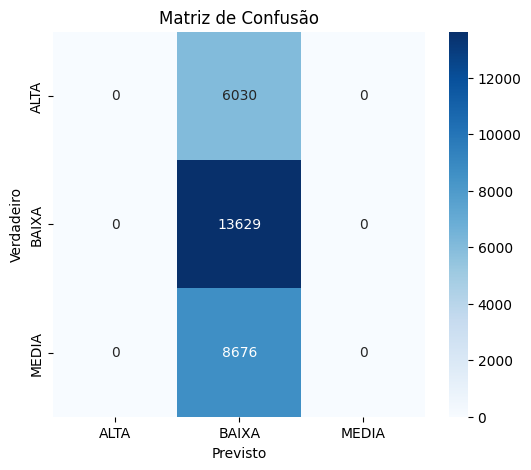

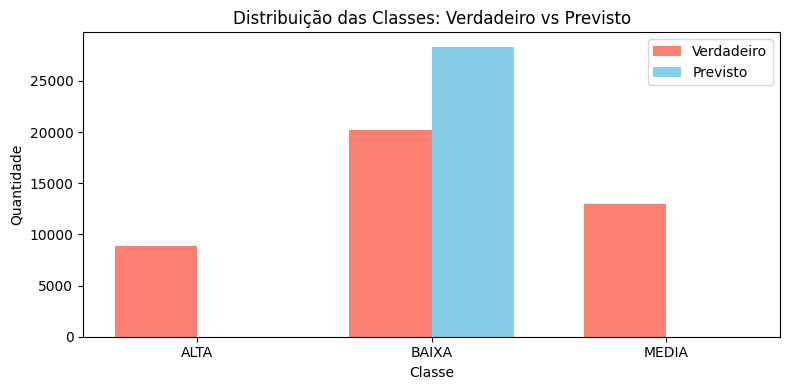

In [13]:
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_true, y_pred, labels=sorted(df_valid['modelo_nivel'].unique()))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df_valid['modelo_nivel'].unique()), yticklabels=sorted(df_valid['modelo_nivel'].unique()))
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Gráfico agrupado: previsto vs verdadeiro
labels = sorted(df_valid['modelo_nivel'].unique())
previstos = pd.Series(y_pred).value_counts().reindex(labels, fill_value=0)
verdadeiros = pd.Series(y_true).value_counts().reindex(labels, fill_value=0)

x = range(len(labels))
width = 0.35
plt.figure(figsize=(8,4))
plt.bar(x, verdadeiros, width=width, label='Verdadeiro', color='salmon')
plt.bar([i + width for i in x], previstos, width=width, label='Previsto', color='skyblue')
plt.xticks([i + width/2 for i in x], labels)
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Distribuição das Classes: Verdadeiro vs Previsto')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Instalação do codecarbon
%pip install codecarbon

from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()

dados_df['nivel_aderencia_IA'] = obter_niveis_aderencia(dados_df, tema_keywords)

emissions = tracker.stop()
print(f"Pegada de carbono estimada (kg CO2eq): {emissions:.6f}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 42046/42046 [1:49:08<00:00,  6.42it/s]  

Pegada de carbono estimada (kg CO2eq): 0.015401



## Abordagens de Baixo Custo Recomendadas

### 1) Classificadores tradicionais / BERT (binário: **ALTO** vs **NÃO-ALTO**)
- **Embeddings** de título + resumo (ex.: SBERT, sentence-transformers).
- **Similaridade** com descrições dos temas (cosine similarity).
- **k-NN** ou **regressão logística** (binário) para decidir se é **ALTO** ou **NÃO-ALTO**.
- **Fine-tuning BERT** com amostras rotuladas (quando disponíveis), restringindo o problema a **ALTO** vs **NÃO-ALTO** para reduzir custo.

### 2) LLMs até **14B** de parâmetros (com ou sem fine-tuning)
- **Zero-shot** e **few-shot** com **avaliação sistemática de prompts**.
- **Quantização** (ex.: 4-bit) para reduzir memória/latência.
- **Instruções** claras: definir o papel do modelo, a rubrica de decisão (BAIXA/MÉDIA/ALTA) e pedidos de explicação concisa.
- **Auto-avaliação** de confiança e calibragem (ex.: pedir ao modelo que dê um nível e uma justificativa, depois verificar consistência).

### 3) Estratégias baseadas em grafos
- Modelagem de **grafos de similaridade** entre produções e temas.
- **GNNs** (Graph Neural Networks) para propagar sinais de rótulo e robustecer decisões.
- Uso de **k-NN em embeddings** para construir arestas e explorar **comunidades** temáticas.



## Avaliação

As soluções submetidas devem vir com uma **descrição técnica** (preferencialmente um artigo submtido na main track do workshop LeanDL) cobrindo:
1. **Acurácia do mapeamento** por nível (BAIXA/MÉDIA/ALTA) ou na formulação binária (ALTO vs NÃO-ALTO).
2. **Custo computacional**: **tempo** e **memória** consumidos durante inferência/treinamento.
3. (Opcional) **Matriz de confusão** e análises de erro para interpretar decisões.

OBS: quem preferir apresentar em formato de poster, deve submeter apenas um abstract detalhando sua solução e uma cópia do código.

### Medindo Pegada de Carbono
Sugestão: utilizar a biblioteca **codecarbon**.
- Instalação e instruções: https://mlco2.github.io/codecarbon/installation.html



## Observações Finais

- **Origem dos dados**: todas as informações são públicas, obtidas do Portal de Transparência da CAPES e do Observatório da Pós-Graduação da CAPES, com foco em **amostras de teses e dissertações defendidas em 2023**.
- **Publicidade das soluções**: as soluções propostas devem ser **públicas** para garantir a **avaliação** por membros do comitê científico do LeanDL-HPC 2025.


# Exemplo simplificado (apenas para ilustração)

Vamos carregar um modelo de linguagem.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen3-4B"

# load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Usando ZeroShot para classificar em algum tema estratégico!

In [ ]:
from codecarbon import EmissionsTracker # para calcular emissões de CO2
tracker = EmissionsTracker()
tracker.start()

# este é um prompt apenas ilustrativo!
prompt = """Você é um avaliador de aderência temática.
Classifique a afinidade entre uma produção acadêmica (título e resumo)
e um TEMA ESTRATÉGICO.

TÍTULO: Heterogeneous Graphs for Text Representation: An Integrated Approach with Language Models

PALAVRAS-CHAVE:
- Heterogeneous networks
- Language models
- Opinion mining
- Representation learning
- Unified embedding space

RESUMO:
Data representation through graphs is essential for analyzing complex relationships in fields like computer science and biology. In real-world scenarios, relationships between vertices do not always follow a uniform pattern, creating the need for heterogeneous graphs representing different types of vertices and various relationships in complex systems. However, heterogeneous graphs come with challenges. Due to the diversity of vertices and types of relationships, the inherent complexity of these structures makes understanding and analyzing them more complex than homogeneous graphs. To address this challenge, several machine learning models specific to heterogeneous graphs have been developed to comprehend the semantics of relationships between entities. Text representation in heterogeneous graphs is also challenging due to the lack of structure in textual data, which can lead to information loss. Additionally, heterogeneous graphs struggle to capture detailed semantic information in texts as they are primarily designed to represent formal structures and structural relationships. Resolving textual ambiguities is also complex for heterogeneous graphs, requiring a deep understanding of textual context. While language models excel at text comprehension, they may not be suitable for representing complex entities and relationships in real-world systems. Accurately identifying entities mentioned in texts and their relationships with real-world entities can be challenging. The integration of heterogeneous graphs and language models offers a promising solution. It combines the structural knowledge of heterogeneous graphs with the textual understanding of language models, resulting in embeddings that incorporate both the structural complexity of graphs and natural language text understanding. This approach can enhance performance in natural language processing, recommendation, and information retrieval tasks. This doctoral thesis focuses on overcoming the limitations of heterogeneous graphs in representing semantic information in texts. The proposal is to combine heterogeneous graphs with language models, leveraging the advantages of both approaches. While graphs represent structures and relationships, language models specialize in efficiently understanding and generating text. The underlying hypothesis is that this combination will result in richer data representations, improving performance in complex data analyses. This thesis introduces a two-stage approach that combines label propagation techniques and language model embeddings to generate vector representations of vertices in heterogeneous graphs. In this approach, the EPHG-CR (Embedding Propagation for Heterogeneous Graphs with Class Refinement) method is proposed, which differentiates itself by considering not only edge weights but also vertex relevance to task classes, bringing vertices with the same class closer together, taking into account the graphs topology. This approach was compared with a language model in the aspect-based sentiment analysis task, showing competitive results and, in some cases, slight superiority. Furthermore, the article explores applications of auxiliary vertex embeddings in other tasks, demonstrating another advantage of the approach.

Responda, qual o NÍVEL DE AFINIDADE (ALTA, MÉDIA ou BAIXA) com o tema estratégico: "Ciência de Dados e Inteligência Artificial" ?

CRITÉRIOS GERAIS:
- ALTA: o tema é central na pesquisa; forte coerência semântica.
- MÉDIA: relação parcial/indireta ou secundária ao tema.
- BAIXA: relação fraca ou tangencial; tema não é foco do trabalho.

RESPOSTA:
"""

# https://huggingface.co/Qwen/Qwen3-4B
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True
)

model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

# conduct text completion
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()

# parsing thinking content
try:
    # rindex finding 151668 (</think>)
    index = len(output_ids) - output_ids[::-1].index(151668)
except ValueError:
    index = 0

thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

print("[LLM OUTPUT] thinking content:", thinking_content)
print("[LLM OUTPUT] content:", content)


emissions: float = tracker.stop()
print("\n\nTotal de emissões (detalhes em emissions.csv): ",emissions)


[codecarbon WARNING @ 23:29:11] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 23:29:11] [setup] RAM Tracking...
[codecarbon INFO @ 23:29:11] [setup] CPU Tracking...
[codecarbon INFO @ 23:29:11] Energy consumed for RAM : 0.000625 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 23:29:11] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 23:29:11] Energy consumed for All CPU : 0.002655 kWh
[codecarbon INFO @ 23:29:11] Energy consumed for all GPUs : 0.003998 kWh. Total GPU Power : 30.806869972978454 W
[codecarbon INFO @ 23:29:11] 0.007277 kWh of electricity used since the beginning.
[codecarbon WARNING @ 23:29:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 23:29:12] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem 

[LLM OUTPUT] thinking content: <think>
Okay, I need to determine the level of thematic alignment between the given academic work and the strategic theme "Ciência de Dados e Inteligência Artificial" (Data Science and Artificial Intelligence). Let's start by understanding both the academic content and the theme.

The title is about heterogeneous graphs for text representation, integrating language models. The keywords include heterogeneous networks, language models, opinion mining, representation learning, and unified embedding space. The abstract discusses challenges in representing text using heterogeneous graphs, the integration of language models to overcome these, and a proposed method (EPHG-CR) that combines label propagation and language model embeddings. The thesis aims to improve performance in NLP tasks like sentiment analysis and information retrieval by combining graph structures with language models.

Now, the strategic theme is Data Science and AI. Data Science involves usi

# Considerações Finais para Participação na Challenge do LeanDL-HPC 2025

* **Como artigo regular:** Se você deseja participar da challenge como **artigo regular** da conferência, submeta seu trabalho na **trilha principal (main track)** da conferência, seguindo as diretrizes do sistema de submissão.

* **Como pôster:** Se você deseja participar da challenge no **formato de pôster**, submeta um **documento de até 2 páginas** descrevendo a solução técnica (objetivo, abordagem, arquitetura/modelos, dados, avaliação e limitações).

> **Observação:** A comissão poderá solicitar, para fins de premiação, que um **novo conjunto de teste** seja executado **antes do evento**, de modo a permitir **comparação justa** entre as soluções.


In [16]:
import gc
import torch

# Limpa variáveis grandes se necessário
# del dados_df, df_valid, y_true, y_pred, model
# gc.collect()

# Se estiver usando GPU, libera memória da CUDA
torch.cuda.empty_cache()
gc.collect()
print('Memória desalocada com sucesso.')

Memória desalocada com sucesso.
